In [1]:
from tqdm import tqdm,trange
import ujson as json
import numpy as np
import random
from IPython import embed
from collections import defaultdict, Counter
import copy
import pickle

import os
import argparse
import torch
from collections import defaultdict
from prepro import *

BERT_DIR = '/cpfs/user/cht/cbsp/'
MAX_SEQ_LENGTH = 1024
file_path = 'dataset/docred/dev_keys_new.json'
rel2id_path = 'meta/rel2id.json'
rel2id = json.load(open(rel2id_path))
id2rel = {v:k for k,v in rel2id.items()}

In [ ]:
for enp_topk in trange(0,1):
    args.dev_file = f'enp_topk/dev_key_enp_topk{enp_topk}.json'
    enp_features = pickle.load(open(f'dataset/docred/enp_topk/enp_topk{enp_topk}.pkl', 'rb'))
    bf, outp = evaluate(args, model, enp_features, tag=f"dev_enp_topk{enp_topk}")
    enp_stat.append(list(outp.values())[0])
len(enp_stat)

In [17]:
enp_stat_atl = pickle.load(open('enp_topk_stat_atlop@roberta.pkl','rb'))
enp_stat_docu = pickle.load(open('enp_topk_stat_docu@roberta.pkl','rb'))
enp_stat_kd = pickle.load(open('enp_topk_KD.pkl','rb'))
len(enp_stat_atl), len(enp_stat_docu), len(enp_stat_kd)

(101, 101, 101, 101)

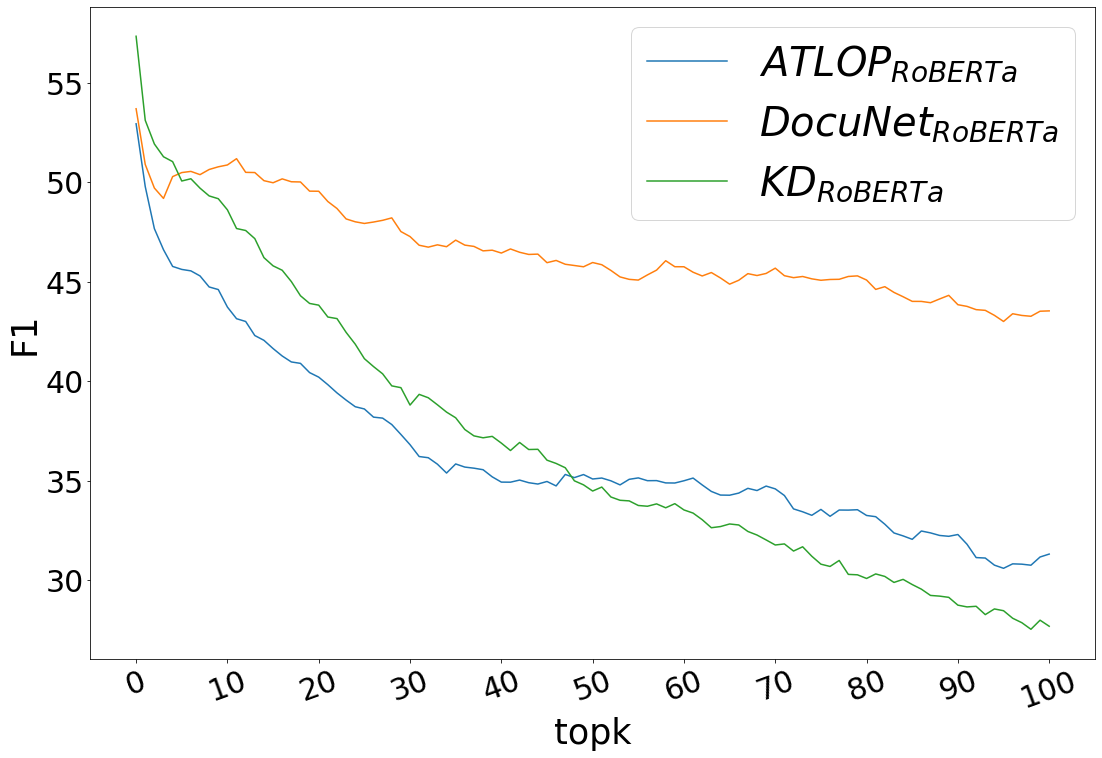

In [19]:
import matplotlib.pyplot as plt
xaixs = range(0,101, 10)
xs = range(len(enp_stat_atl))
fs = 30
label_font = {'size': 35}
plt.figure(figsize=(18,12))
plt.xlabel('topk', label_font)
plt.ylabel('F1', label_font)
plt.xticks(xaixs, fontsize=fs, rotation=20)
plt.yticks(fontsize=fs)
plt.plot( xs, enp_stat_atl, label=r'$ATLOP_{RoBERTa}$')
plt.plot( xs, enp_stat_docu, label='$DocuNet_{RoBERTa}$')
plt.plot( xs, enp_stat_kd, label='$KD_{RoBERTa}$')
plt.legend(fontsize=40)
plt.savefig('enp_topk_tf.png')

### Load mAP Stat

In [6]:
MAX_TOPK = 100
ig_atl_nmap_stat = pickle.load(open('keyword_pkl/ig_atl_map_stat.pkl','rb'))
ig_docu_nmap_stat = pickle.load(open('keyword_pkl/ig_docu_map_stat.pkl','rb'))
ig_docre_nmap_stat = pickle.load(open('keyword_pkl/ig_docre_map_stat.pkl','rb'))


### Single mAP figure

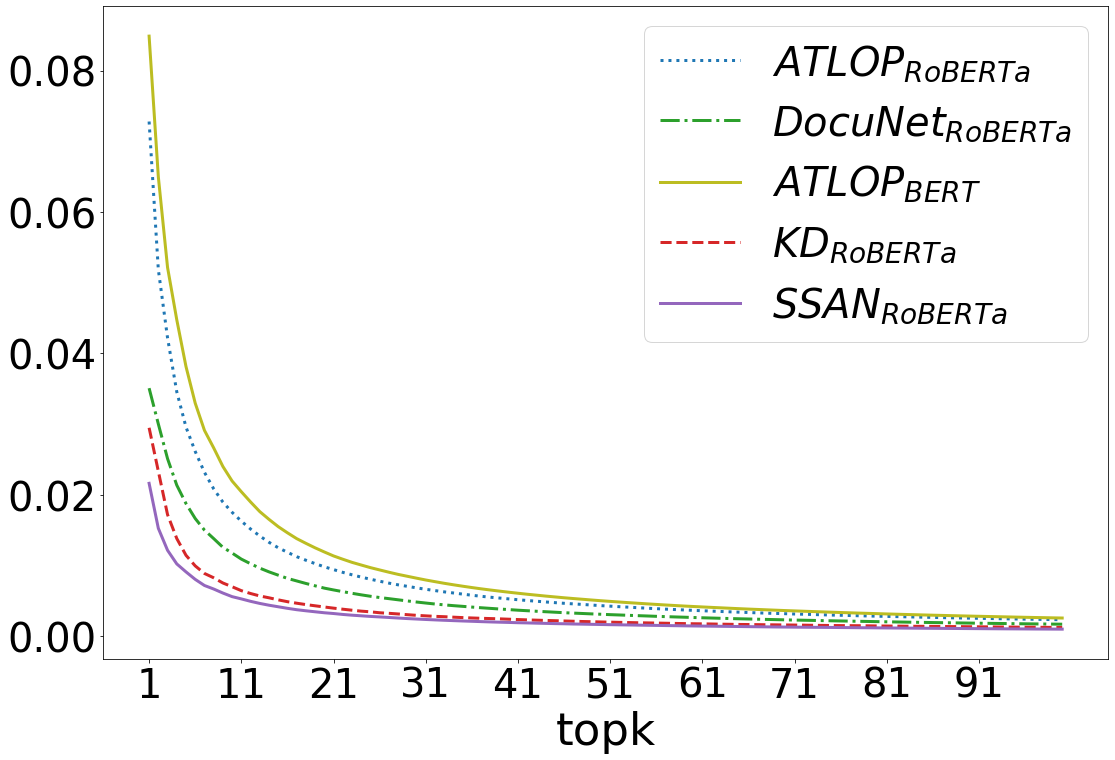

In [13]:
import matplotlib.pyplot as plt
xaixs = range(1,MAX_TOPK+1)
xticks = range(1,MAX_TOPK+1, 10)
fs = 40
lw = 3
lsts = ['-','--','-.',':']
colors = plt.cm.tab10(np.linspace(0, 1, 10))
label_font = {'size': fs + 5}
plt.figure(figsize=(18,12))
plt.xlabel('topk', label_font)
# plt.ylabel('NMAP', label_font)
plt.xticks(xticks, fontsize=fs)
plt.yticks(fontsize=fs)
plt.plot(xaixs, ig_atl_nmap_stat, label='$ATLOP_{RoBERTa}$', linestyle=lsts[3],linewidth=lw,color=colors[0])
plt.plot(xaixs, ig_docu_nmap_stat, label='$DocuNet_{RoBERTa}$', linestyle=lsts[2],linewidth=lw, color=colors[2])
plt.plot(xaixs, ig_docre_nmap_stat, label='$ATLOP_{BERT}$', linestyle=lsts[0], linewidth=lw, color=colors[8])

plt.plot(xaixs, grad_kd_nmap_stats, label='$KD_{RoBERTa}$', linestyle=lsts[1], linewidth=lw, color=colors[3])
plt.plot(xaixs, grad_ssan_nmap_stats, label='$SSAN_{RoBERTa}$', linestyle=lsts[0], linewidth=lw, color=colors[4])

plt.legend(fontsize=fs)

plt.savefig('nmap_f0.png')